<a href="https://colab.research.google.com/github/FeedingDejaj/MAT421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20.1 Numerical Differentiation Problem Statement

- In numerical differentiation, the goal is to approximate the derivative of a function using its values at discrete points.

- Unlike analytical differentiation, we use finite difference formulas such as forward, backward, or central differences to estimate derivatives.

- The accuracy of these methods depends on the chosen step size h. A smaller h can reduce truncation error but may increase round-off error.

- This problem statement emphasizes finding an optimal balance between these errors to obtain a reliable approximation of the derivative.


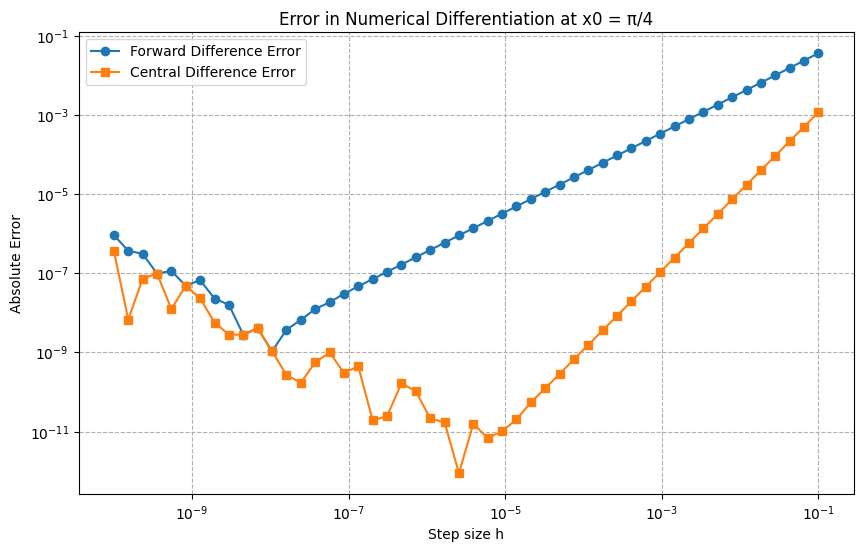

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def df_exact(x):
    return np.cos(x)

def forward_diff(f, x, h):
    return (f(x+h) - f(x)) / h

def central_diff(f, x, h):
    return (f(x+h) - f(x-h)) / (2*h)

x0 = np.pi/4
h_values = np.logspace(-10, -1, 50)
errors_forward = []
errors_central = []

true_deriv = df_exact(x0)

for h in h_values:
    approx_forward = forward_diff(f, x0, h)
    approx_central = central_diff(f, x0, h)
    errors_forward.append(abs(approx_forward - true_deriv))
    errors_central.append(abs(approx_central - true_deriv))

plt.figure(figsize=(10,6))
plt.loglog(h_values, errors_forward, 'o-', label='Forward Difference Error')
plt.loglog(h_values, errors_central, 's-', label='Central Difference Error')
plt.xlabel('Step size h')
plt.ylabel('Absolute Error')
plt.title('Error in Numerical Differentiation at x0 = π/4')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()




---



# 20.2 Finite Difference Approximating Derivatives

- Finite difference methods approximate the derivative of a function by using its values at nearby points.

- The most common formulas include:
  - Forward Difference: f'(x) ≈ [f(x + h) - f(x)] / h (error order O(h))
  - Backward Difference: f'(x) ≈ [f(x) - f(x - h)] / h (error order O(h))
  - Central Difference: f'(x) ≈ [f(x + h) - f(x - h)] / (2h) (error order O(h^2))
  
- These formulas help balance truncation error and round-off error when choosing an appropriate step size h.


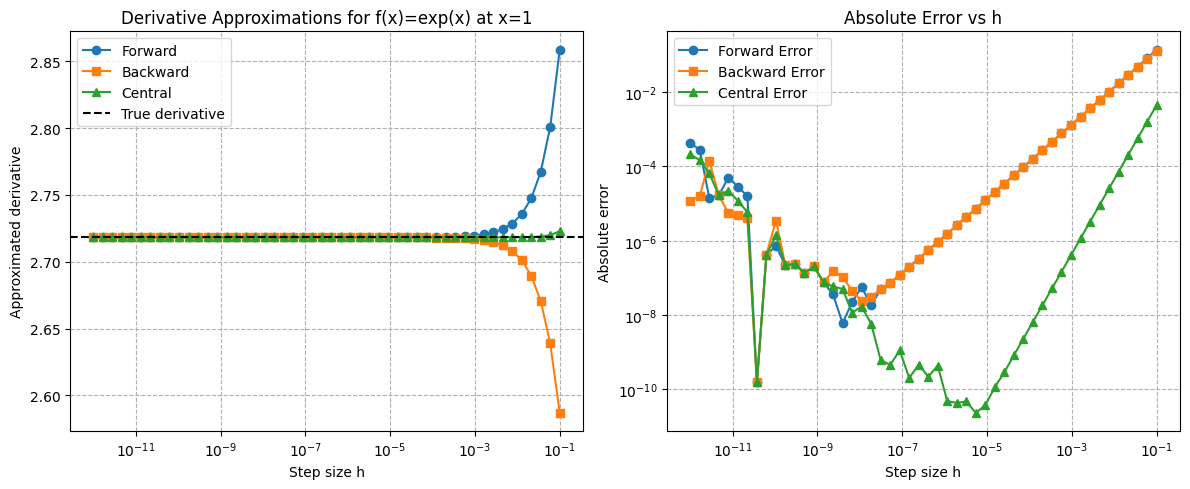

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(x)

def df_exact(x):
    return np.exp(x)

def forward_diff(f, x, h):
    return (f(x+h) - f(x)) / h

def backward_diff(f, x, h):
    return (f(x) - f(x-h)) / h

def central_diff(f, x, h):
    return (f(x+h) - f(x-h)) / (2*h)

x0 = 1.0
h_values = np.logspace(-12, -1, 50)
approx_forward = np.array([forward_diff(f, x0, h) for h in h_values])
approx_backward = np.array([backward_diff(f, x0, h) for h in h_values])
approx_central = np.array([central_diff(f, x0, h) for h in h_values])
true_val = df_exact(x0)

error_forward = np.abs(approx_forward - true_val)
error_backward = np.abs(approx_backward - true_val)
error_central = np.abs(approx_central - true_val)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.semilogx(h_values, approx_forward, 'o-', label='Forward')
plt.semilogx(h_values, approx_backward, 's-', label='Backward')
plt.semilogx(h_values, approx_central, '^-', label='Central')
plt.axhline(true_val, color='black', linestyle='--', label='True derivative')
plt.xlabel('Step size h')
plt.ylabel('Approximated derivative')
plt.title('Derivative Approximations for f(x)=exp(x) at x=1')
plt.legend()
plt.grid(True, which='both', ls='--')

plt.subplot(1,2,2)
plt.loglog(h_values, error_forward, 'o-', label='Forward Error')
plt.loglog(h_values, error_backward, 's-', label='Backward Error')
plt.loglog(h_values, error_central, '^-', label='Central Error')
plt.xlabel('Step size h')
plt.ylabel('Absolute error')
plt.title('Absolute Error vs h')
plt.legend()
plt.grid(True, which='both', ls='--')

plt.tight_layout()
plt.show()




---


# 20.3 Approximating Higher Order Derivatives

- Finite difference methods can be extended to approximate higher order derivatives.

- For the second derivative, a common central difference formula is:  
  f''(x) ≈ [f(x + h) - 2*f(x) + f(x - h)] / (h^2)  
  This formula has an error of order O(h^2).

- An alternative forward difference formula for the second derivative is:  
  f''(x) ≈ [f(x + 2h) - 2*f(x + h) + f(x)] / (h^2)
  
- These approximations are useful for solving differential equations and in optimization problems that require curvature information.


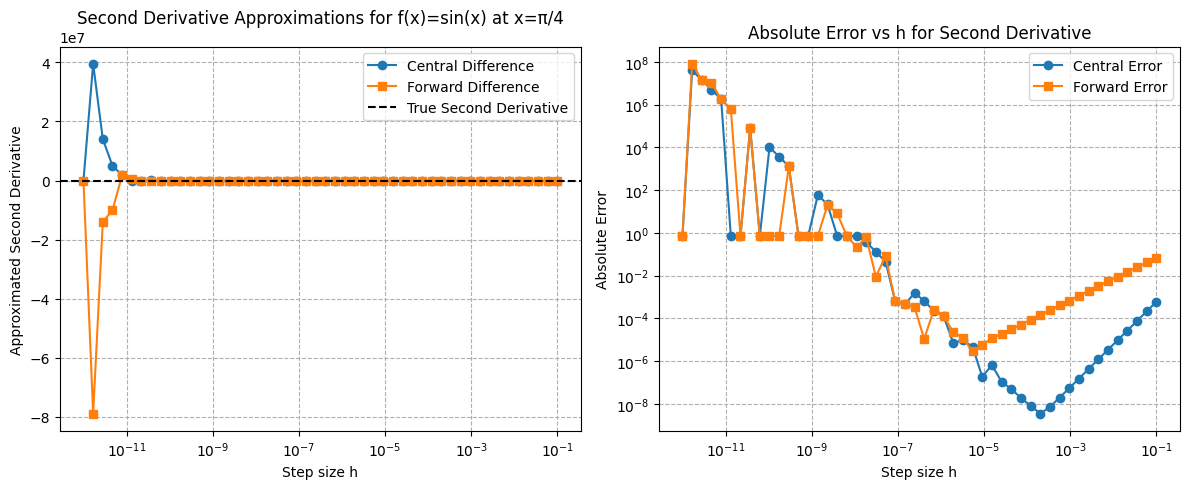

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def f2_exact(x):
    return -np.sin(x)

def second_deriv_central(f, x, h):
    return (f(x+h) - 2*f(x) + f(x-h)) / (h**2)

def second_deriv_forward(f, x, h):
    return (f(x+2*h) - 2*f(x+h) + f(x)) / (h**2)

x0 = np.pi/4
h_values = np.logspace(-12, -1, 50)
approx_central = np.array([second_deriv_central(f, x0, h) for h in h_values])
approx_forward = np.array([second_deriv_forward(f, x0, h) for h in h_values])
true_val = f2_exact(x0)
error_central = np.abs(approx_central - true_val)
error_forward = np.abs(approx_forward - true_val)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.semilogx(h_values, approx_central, 'o-', label='Central Difference')
plt.semilogx(h_values, approx_forward, 's-', label='Forward Difference')
plt.axhline(true_val, color='black', linestyle='--', label='True Second Derivative')
plt.xlabel('Step size h')
plt.ylabel('Approximated Second Derivative')
plt.title('Second Derivative Approximations for f(x)=sin(x) at x=π/4')
plt.legend()
plt.grid(True, which='both', ls='--')

plt.subplot(1,2,2)
plt.loglog(h_values, error_central, 'o-', label='Central Error')
plt.loglog(h_values, error_forward, 's-', label='Forward Error')
plt.xlabel('Step size h')
plt.ylabel('Absolute Error')
plt.title('Absolute Error vs h for Second Derivative')
plt.legend()
plt.grid(True, which='both', ls='--')

plt.tight_layout()
plt.show()




---



# 20.4 Numerical Differentiation with Noise

- When function values include noise, the finite difference approximations of derivatives become less reliable.

- Using a very small step size (h) reduces truncation error but amplifies the impact of noise.

- Conversely, a larger h may smooth out the noise but increase the truncation error.

- There is an optimal balance where the total error (from both truncation and noise) is minimized.

- Techniques such as averaging multiple noisy measurements or pre-smoothing the data can help mitigate noise effects.


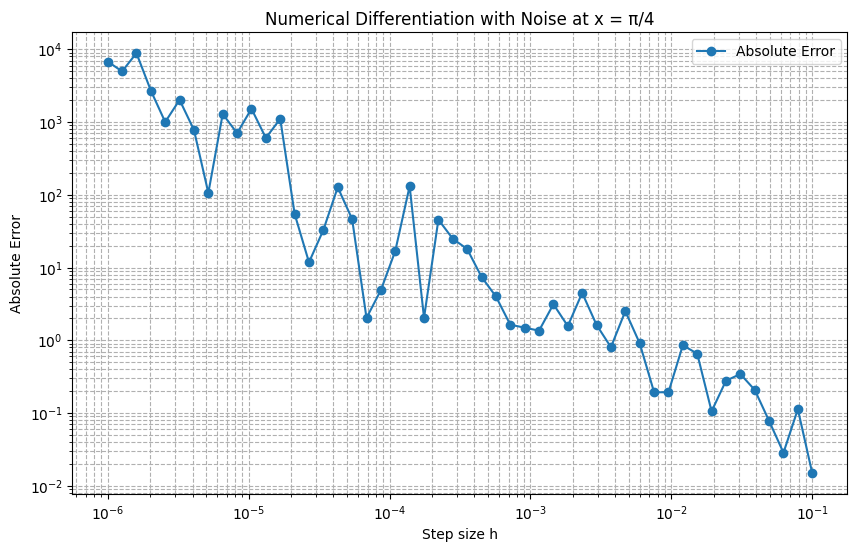

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

def f_noisy(x, noise=0.01):
    return np.sin(x) + noise * np.random.randn(*np.atleast_1d(x).shape)

def df_exact(x):
    return np.cos(x)

def central_diff_noisy(f, x, h):
    return (f(x+h) - f(x-h)) / (2 * h)

x0 = np.pi / 4
h_values = np.logspace(-6, -1, 50)
errors = []
true_deriv = df_exact(x0)

for h in h_values:
    approx = central_diff_noisy(f_noisy, x0, h)
    errors.append(abs(approx - true_deriv))

plt.figure(figsize=(10,6))
plt.loglog(h_values, errors, 'o-', label='Absolute Error')
plt.xlabel('Step size h')
plt.ylabel('Absolute Error')
plt.title('Numerical Differentiation with Noise at x = π/4')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()
